In [1]:
# 1. Использовать датасет, подготовленный на первой лабораторной работе.

import pandas as pd

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from matplotlib import pyplot as plt
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

df = pd.read_csv("../Lab1/processed_lab1.csv")  # путь к файлу

In [2]:
# 2. Решить задачу классификации методом случайного леса. Оценить работу модели через OOB данные.

# Данные для задачи КЛАССИФИКАЦИИ методом случайного леса
X_classification_rf = df.drop(['Transported'], axis="columns")
y_classification_rf = df['Transported']

rf_classifier_model = RandomForestClassifier(max_depth=4, random_state=5, bootstrap=True, oob_score=True, max_features="sqrt")
rf_classifier_model.fit(X_classification_rf, y_classification_rf)

# Вероятностное предсказание
y_predict_classification_rf = rf_classifier_model.predict_proba(X_classification_rf)[:, 1]

# Оценка работы модели через OOB данные
# Accuracy для OOB значения
print("OOB Accuracy:", rf_classifier_model.oob_score_)
# Out-Of-Bag Error
print("OOBE: ", 1 - rf_classifier_model.oob_score_)

OOB Accuracy: 0.7530196709996549
OOBE:  0.24698032900034506


In [3]:
# 3. Решить задачу классификации методом AdaBoost и методом градиентного бустинга.

# 1) Задача классификации методом AdaBoost

# Разделим датасет, подготовленный на первой лабораторной работе, на обучающую и тестовую выборки.
# Данные для задачи КЛАССИФИКАЦИИ методом AdaBoost
X_classification_AB = df.drop(['Transported'], axis="columns")
y_classification_AB = df['Transported']

X_train_classification_AB, X_test_classification_AB, y_train_classification_AB, y_test_classification_AB = train_test_split(X_classification_AB, y_classification_AB, test_size=0.4, random_state=3)

ad_classifier_model = AdaBoostClassifier(n_estimators=10, learning_rate=0.5, random_state=44)
ad_classifier_model.fit(X_train_classification_AB, y_train_classification_AB)

# Вероятностное предсказание
y_predict_test_classification_AB = ad_classifier_model.predict_proba(X_test_classification_AB)[:, 1]

# 2) Задача классификации методом градиентного бустинга

# Разделим датасет, подготовленный на первой лабораторной работе, на обучающую и тестовую выборки.
# Данные для задачи КЛАССИФИКАЦИИ методом градиентного бустинга
X_classification_GB = df.drop(['Transported'], axis="columns")
y_classification_GB = df['Transported']

X_train_classification_GB, X_test_classification_GB, y_train_classification_GB, y_test_classification_GB = train_test_split(X_classification_GB, y_classification_GB, test_size=0.4, random_state=73)

gb_classifier_model = GradientBoostingClassifier(max_depth=5, n_estimators=100, learning_rate=0.5, random_state=2)
gb_classifier_model.fit(X_train_classification_GB, y_train_classification_GB)

# Вероятностное предсказание
y_predict_test_classification_GB = gb_classifier_model.predict_proba(X_test_classification_GB)[:, 1]


ROC-кривая модели классификации случайного леса:


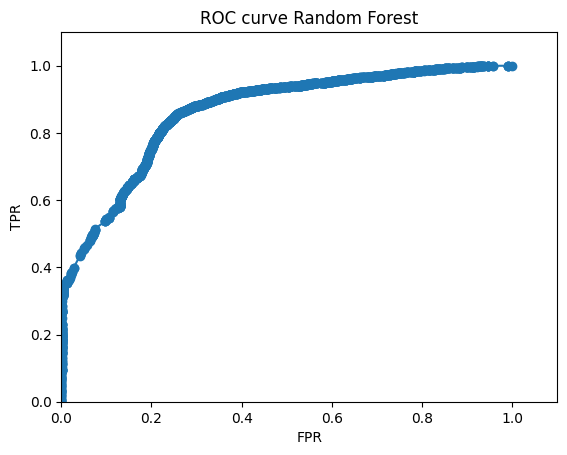

AUC случайного дерева: 0.8623095727240437

ROC-кривая модели классификации AdaBoost:


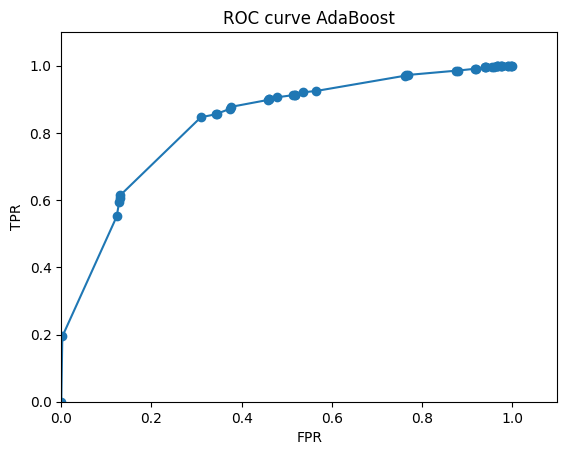

AUC AdaBoost: 0.8292932509543424

ROC-кривая модели классификации градиентного бустинга:


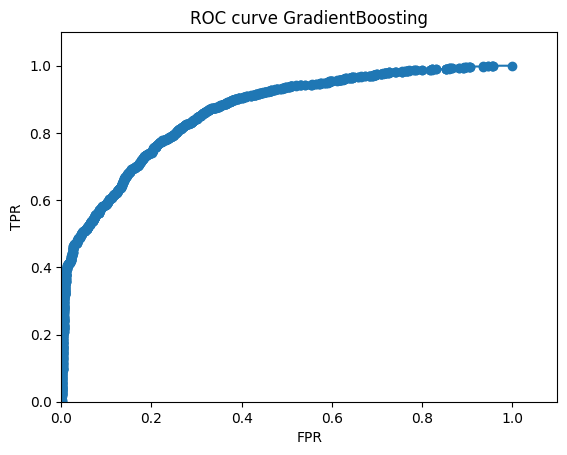

AUC градиентного бустинга: 0.8630165300188634


In [4]:
# 4. Оценить работу моделей и построить ROC-кривые.

# 1) Оценка модели случайного леса
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_classification_rf, y_predict_classification_rf)

print("\nROC-кривая модели классификации случайного леса:")
plt.plot(fpr_rf, tpr_rf, marker='o')
plt.ylim([0,1.1])
plt.xlim([0,1.1])
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.title('ROC curve Random Forest')
plt.show()

auc_metric_rf = auc(fpr_rf, tpr_rf)
print(f"AUC случайного дерева: {auc_metric_rf}")

# 2) Оценка модели AdaBoost
fpr_AB, tpr_AB, thresholds_AB = roc_curve(y_test_classification_AB, y_predict_test_classification_AB)

print("\nROC-кривая модели классификации AdaBoost:")
plt.plot(fpr_AB, tpr_AB, marker='o')
plt.ylim([0,1.1])
plt.xlim([0,1.1])
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.title('ROC curve AdaBoost')
plt.show()

auc_metric_AB = auc(fpr_AB, tpr_AB)
print(f"AUC AdaBoost: {auc_metric_AB}")

# 3) Оценка модели градиентного бустинга
fpr_GB, tpr_GB, thresholds_GB = roc_curve(y_test_classification_GB, y_predict_test_classification_GB)

print("\nROC-кривая модели классификации градиентного бустинга:")
plt.plot(fpr_GB, tpr_GB, marker='o')
plt.ylim([0,1.1])
plt.xlim([0,1.1])
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.title('ROC curve GradientBoosting')
plt.show()
plt.show()

auc_metric_GB = auc(fpr_GB, tpr_GB)
print(f"AUC градиентного бустинга: {auc_metric_GB}")